In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
%matplotlib inline
%load_ext watermark
%load_ext autoreload 
%autoreload 2

%watermark -a 'Ethen' -d -t -v -p numpy,matplotlib

Ethen 2017-01-26 17:56:30 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.3
matplotlib 1.5.1


In [19]:
A = np.array([[4.0, 1.0], [1.0, 3.0]])
b = np.array([1.0, 2.0])
A

array([[ 4.,  1.],
       [ 1.,  3.]])

In [20]:
b

array([ 1.,  2.])

In [21]:
np.linalg.solve(A, b)

array([ 0.09090909,  0.63636364])

In [22]:
x0 = np.array([2, 1])

# the initial residual is computed from b - Ax
r0 = b - A @ x0

# since this is the first iteration, the residual r
# will also be the search direction p
p0 = r0

r0

array([-8., -3.])

In [30]:
# compute scalar alpha
a0 = r0.T @ r0 / (p0.T @ A @ p0)

# update solution, this ends the first iteration,
# where the result is an "improved approximation solution"
x1 = x0 + a0 * p0
x1

array([ 0.23564955,  0.33836858])

In [31]:
# compute the next residual
r1 = r0 - a0 * A @ p0
r1

array([-0.28096677,  0.74924471])

In [32]:
# compute the scalar B that will
# be used to determine the next search direction
B = r1.T @ r1 / (r0.T @ r0)
B

0.0087713693741386066

In [34]:
# computet the next search direction p
p1 = r1 + B * p0
p1

array([-0.35113772,  0.7229306 ])

In [35]:
# compute the scalar will be
# used to update the new approximation
a1 = r1.T @ r1 / (p1.T @ A @ p1)
a1

0.41220423412204232

In [36]:
# new approximation matches the solution
# using np.linalg.solve
x2 = x1 + a1 * p1
x2

array([ 0.09090909,  0.63636364])

In [16]:
A = np.array([[3.0, 2.0], [2.0, 6.0]])
b = np.array([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

def f(x, A, b, c):
    return 0.5 * x.T * A * x - b.T * x + c

In [8]:
def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0)
    fig.show()
    return x1, x2, zs

In [23]:
size = 20
x1 = np.linspace(-6, 6, size)
x2 = np.linspace(-6, 6, size)
x1, x2 = np.meshgrid(x1, x2)

def f(x, A, b, c):
    return 0.5 * x.T @ A @ x - b.T @ x + c

z = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        x = np.array([ x1[i, j], x2[i, j] ])
        z[i, j] = f(x, A, b, c)

In [39]:
def contoursteps(x1, x2, z, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, z)
    plt.clabel(cp, fontsize = 10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:, 0], steps[:, 1], '-o')

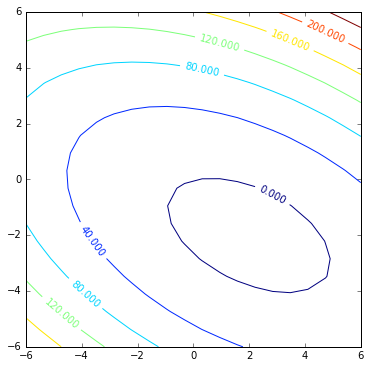

In [40]:
contoursteps(x1, x2, z)

In [9]:
x1, x2, zs = bowl(A, b, c)